# **Hierarchical Clustering**

> [**Hierarchical Clustering**](https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering)

> [**sklearn.cluster.AgglomerativeClustering**](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering)

> [**Kaggle Dataset**](https://www.kaggle.com/shwetabh123/mall-customers)

In [1]:
# Import Library.
import pandas as pd
import matplotlib.pyplot as plt

# Import Dataset.
dataset = pd.read_csv("Mall_Customers.csv")

X = dataset.iloc[:, [3, 4]].values

### **Use the Dendrogram to find the optimal number of clusters.**

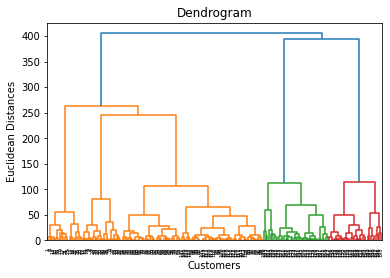

In [2]:
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(X, method="ward"))
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean Distances")
plt.show()

### **Train the Hierarchical Clustering model on the dataset.**

In [3]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=5, affinity="euclidean", linkage="ward")
y_hc = hc.fit_predict(X)

### **Visualize the Clusters.**

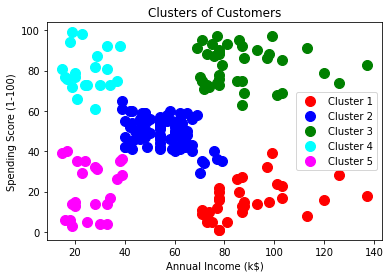

In [4]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s=100, c="red", label="Cluster 1")
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s=100, c="blue", label="Cluster 2")
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s=100, c="green", label="Cluster 3")
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s=100, c="cyan", label="Cluster 4")
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s=100, c="magenta", label="Cluster 5")
plt.title("Clusters of Customers")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()

# **K-Means Clustering and Silhouette Coefficient**

> [**K-Means Clustering**](https://scikit-learn.org/stable/modules/clustering.html#k-means)

> [**sklearn.cluster.KMeans**](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

> [**Kaggle Dataset**](https://www.kaggle.com/shwetabh123/mall-customers)

In [5]:
# Import Library.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

# Import Dataset
dataset = pd.read_csv("Mall_Customers.csv")

X = dataset.iloc[:, [3, 4]].values

range_n_clusters = [2, 3, 4, 5, 6]

### Use the **Elbow Method** to find the optimal number of clusters.

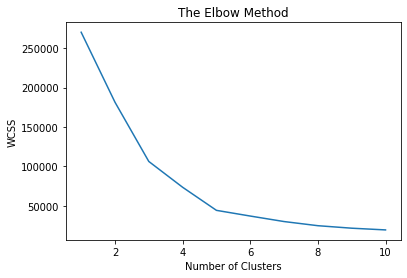

In [6]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state=42).fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

### **Train the K-Means Clustering model on the dataset.**



In [7]:
kmeans = KMeans(n_clusters=5, init="k-means++", random_state=42)
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


### **Visualize the Clusters.**

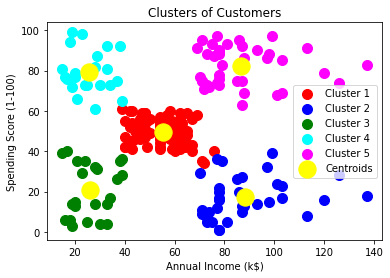

In [8]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c="red", label="Cluster 1")
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c="blue", label="Cluster 2")
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c="green", label="Cluster 3")
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=100, c="cyan", label="Cluster 4")
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s=100, c="magenta", label="Cluster 5")
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    s=300,
    c="yellow",
    label="Centroids",
)
plt.title("Clusters of Customers")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()

## **Performance Metrics Clustering - Silhouette Coefficient**

[**Select the number of clusters with silhouette analysis on K-Means Clustering**](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#)

For n_clusters = 2 The average silhouette_score is : 0.2968969162503008
For n_clusters = 3 The average silhouette_score is : 0.46761358158775435
For n_clusters = 4 The average silhouette_score is : 0.4931963109249047
For n_clusters = 5 The average silhouette_score is : 0.553931997444648
For n_clusters = 6 The average silhouette_score is : 0.5376203956398481


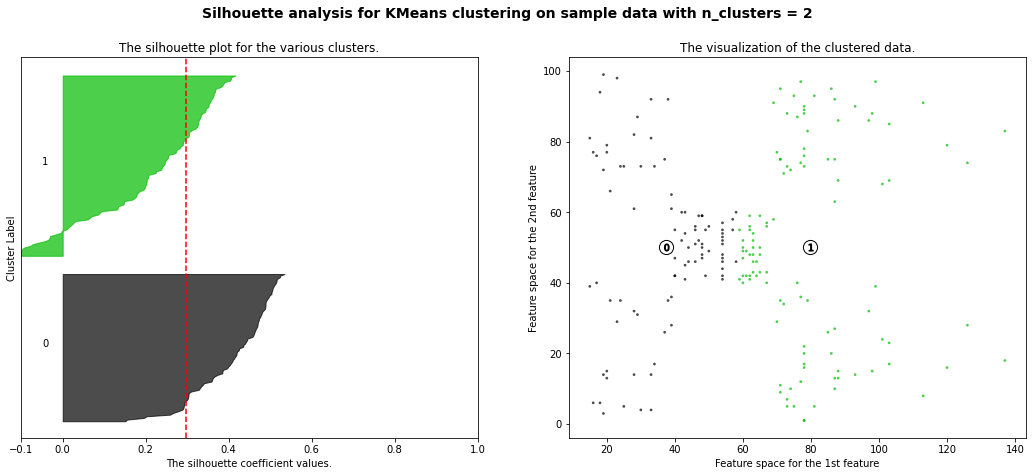

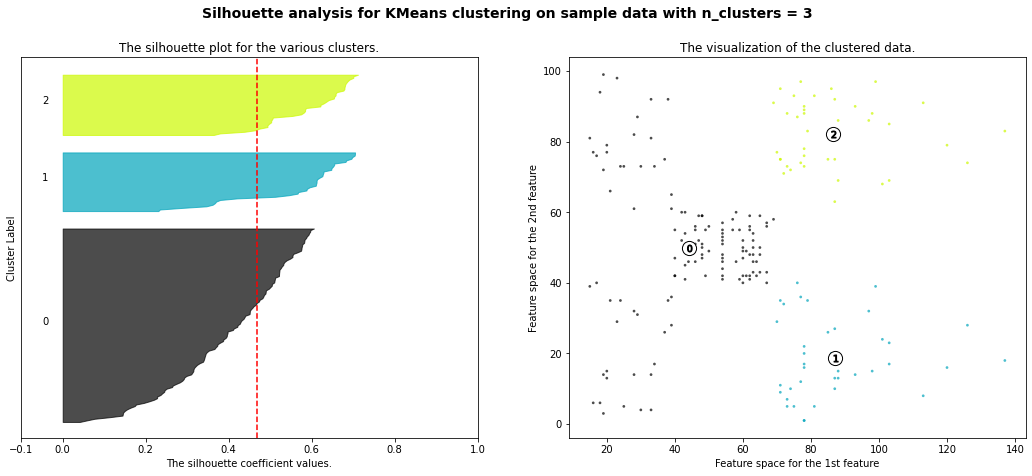

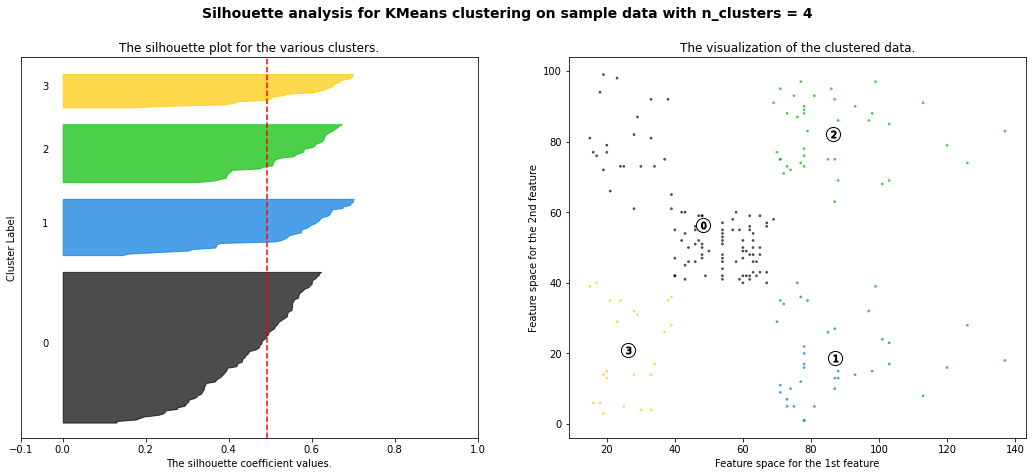

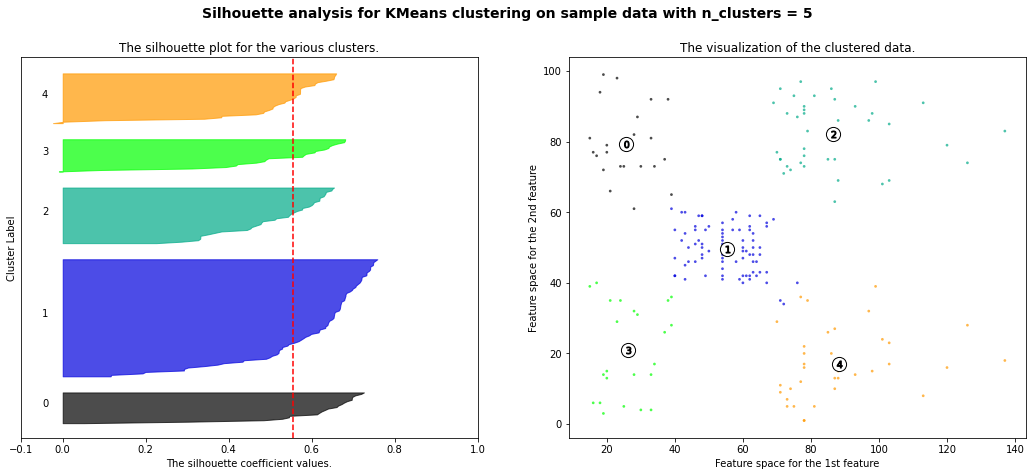

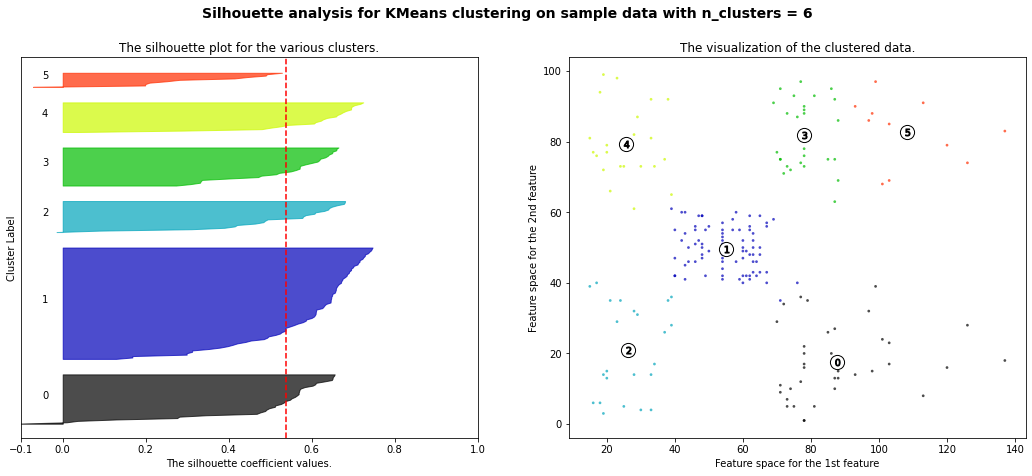

In [9]:
for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower = 10

    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values.")
    ax1.set_ylabel("Cluster Label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )
    centers = clusterer.cluster_centers_
    ax2.scatter(
        centers[:, 0], centers[:, 1], marker="o", c="white", alpha=1, s=200, edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(
        (
            "Silhouette analysis for KMeans clustering on sample data "
            "with n_clusters = %d" % n_clusters
        ),
        fontsize=14,
        fontweight="bold",
    )

plt.show()

# **K-Modes Clustering Algorithm for Categorical Data**

*K-Modes Clustering is one of the unsupervised Machine Learning algorithms used to cluster both numeric and categorical variables.*

> [**K-Modes (GitHub)**](https://github.com/nicodv/kmodes)

> [**K-Prototypes (Blog)**](https://antonsruberts.github.io/kproto-audience/)

> [**K-Modes Clustering (Analytics Vidhya)**](https://www.analyticsvidhya.com/blog/2021/06/kmodes-clustering-algorithm-for-categorical-data/)

In [ ]:
!pip install kmodes

In [11]:
from kmodes.kprototypes import KPrototypes
import pandas as pd

data = pd.read_csv(
    "http://www.creditriskanalytics.net/uploads/1/9/5/1/19511601/hmeq.csv"
)
data.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [12]:
# Drop Missing Values.
data = data.dropna()

# Drop Class Label.
data = data.drop(["BAD"], axis=1)

# Convert Numeric to Float Value.
data.iloc[:, 0] = data.iloc[:, 0].astype(float)

# Data Shape.
print("The shape of the dataset is", data.shape, "\n")

data.head()

The shape of the dataset is (3364, 12) 



,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
5,1700.0,30548.0,40320.0,HomeImp,Other,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614
7,1800.0,28502.0,43034.0,HomeImp,Other,11.0,0.0,0.0,88.766030,0.0,8.0,36.884894
19,2300.0,102370.0,120953.0,HomeImp,Office,2.0,0.0,0.0,90.992533,0.0,13.0,31.588503
25,2400.0,34863.0,47471.0,HomeImp,Mgr,12.0,0.0,0.0,70.491080,1.0,21.0,38.263601
26,2400.0,98449.0,117195.0,HomeImp,Office,4.0,0.0,0.0,93.811775,0.0,13.0,29.681827


In [ ]:
kproto = KPrototypes(n_clusters=3, verbose=2, max_iter=20)
clusters = kproto.fit_predict(data, categorical=[3, 4])

In [ ]:
print(kproto.cluster_centroids_)

In [15]:
cluster_dict = []
for c in clusters:
    cluster_dict.append(c)

In [16]:
data["cluster"] = cluster_dict
data

,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,cluster
5,1700.0,30548.0,40320.0,HomeImp,Other,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614,1
7,1800.0,28502.0,43034.0,HomeImp,Other,11.0,0.0,0.0,88.766030,0.0,8.0,36.884894,1
19,2300.0,102370.0,120953.0,HomeImp,Office,2.0,0.0,0.0,90.992533,0.0,13.0,31.588503,2
25,2400.0,34863.0,47471.0,HomeImp,Mgr,12.0,0.0,0.0,70.491080,1.0,21.0,38.263601,1
26,2400.0,98449.0,117195.0,HomeImp,Office,4.0,0.0,0.0,93.811775,0.0,13.0,29.681827,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,88900.0,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347,1
5956,89000.0,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971,1
5957,89200.0,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590,1
5958,89800.0,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882,1


In [17]:
# data[data["cluster"]== 0].head()

In [18]:
# data[data["cluster"]== 1].head()

In [19]:
# data[data["cluster"]== 2].head()